In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.drop('Id', axis=1, inplace=True)


In [8]:
#encoded targer level
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])


In [15]:
#Split Dataset
from sklearn.model_selection import train_test_split
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
#Import KNN and metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [22]:
#Initialize and train the model
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [23]:
#Make predictions
y_pred = knn.predict(X_test)


In [24]:
#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



K = 1, Accuracy = 1.000
K = 2, Accuracy = 1.000
K = 3, Accuracy = 1.000
K = 4, Accuracy = 1.000
K = 5, Accuracy = 1.000
K = 6, Accuracy = 1.000
K = 7, Accuracy = 0.967
K = 8, Accuracy = 1.000
K = 9, Accuracy = 1.000
K = 10, Accuracy = 1.000
K = 11, Accuracy = 1.000
K = 12, Accuracy = 1.000
K = 13, Accuracy = 1.000
K = 14, Accuracy = 1.000
K = 15, Accuracy = 1.000
K = 16, Accuracy = 1.000
K = 17, Accuracy = 1.000
K = 18, Accuracy = 1.000
K = 19, Accuracy = 1.000
K = 20, Accuracy = 1.000


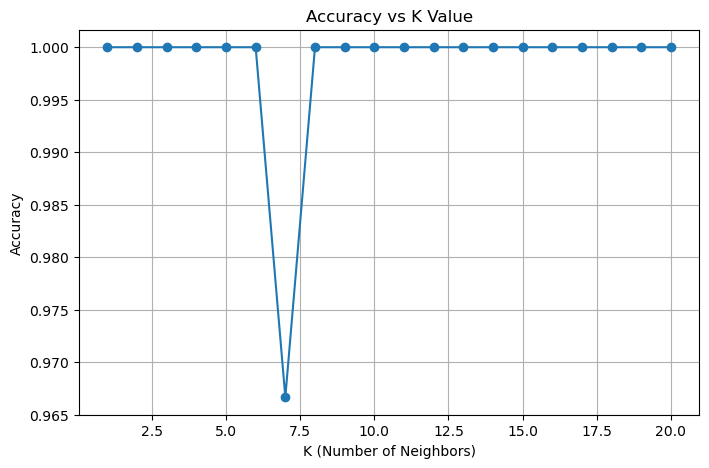

In [25]:
import matplotlib.pyplot as plt

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k}, Accuracy = {acc:.3f}")

# Plot Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("Accuracy vs K Value")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [26]:
#calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [27]:
#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


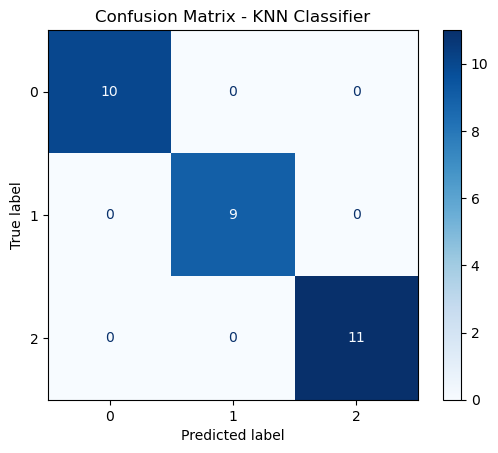

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create and plot the display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN Classifier")
plt.show()


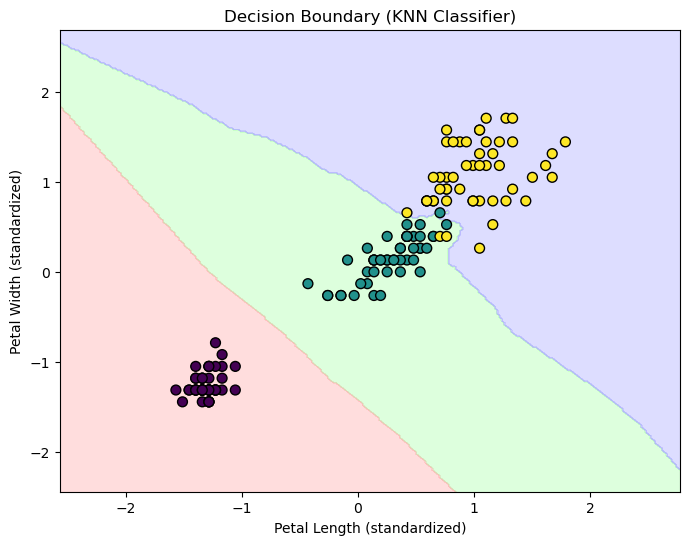

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Choose any two features (for 2D visualization)
X_plot = X_scaled[:, 2:4]   # PetalLengthCm, PetalWidthCm
y_plot = y

# Split again for visualization
from sklearn.model_selection import train_test_split
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y_plot, test_size=0.2, random_state=42)

# Train KNN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_plot, y_train_plot)

# Create a mesh grid
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for each point in the mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define colors for classes
colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Plot decision boundaries
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=colors, alpha=0.4)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, edgecolor='k', s=50)
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.title('Decision Boundary (KNN Classifier)')
plt.show()
